In [1]:
# load training data

from glob import glob
from scipy.misc import imread
import numpy as np

images = []
genders = []

print('Loading data...')

image_paths = glob('./data/girl/*')

for path in image_paths:
    data = imread(path, flatten=True).flatten()
    images.append(data)
    genders.append((1, 0))

image_paths = glob('./data/guy/*')

for path in image_paths:
    data = imread(path, flatten=True).flatten()
    images.append(data)
    genders.append((0, 1))

images = np.asarray(images)
genders = np.asarray(genders)

print('Done')    
print(images.shape)
print(genders.shape)
print(images[0])
print(genders[0])

Loading data...
Done
(13513, 1024)
(13513, 2)
[ 101.  183.  241. ...,  102.  100.  124.]
[1 0]


In [2]:
# Train model

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
        Dense(200, activation='relu', input_dim=images[0].size,),   
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(2, activation='softmax'),
    ])

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(images, genders, validation_split=0.2)

Using TensorFlow backend.


Train on 10810 samples, validate on 2703 samples
Epoch 1/10
10810/10810 [==============================] - 11s - loss: 0.6619 - acc: 0.6249 - val_loss: 0.7607 - val_acc: 0.5283
Epoch 2/10
10810/10810 [==============================] - 9s - loss: 0.5552 - acc: 0.7215 - val_loss: 0.8254 - val_acc: 0.6012
Epoch 3/10
10810/10810 [==============================] - 8s - loss: 0.5093 - acc: 0.7529 - val_loss: 0.5931 - val_acc: 0.7166
Epoch 4/10
10810/10810 [==============================] - 9s - loss: 0.4684 - acc: 0.7833 - val_loss: 0.5447 - val_acc: 0.7899
Epoch 5/10
10810/10810 [==============================] - 9s - loss: 0.4384 - acc: 0.8035 - val_loss: 1.2407 - val_acc: 0.4495
Epoch 6/10
10810/10810 [==============================] - 9s - loss: 0.4173 - acc: 0.8103 - val_loss: 0.9557 - val_acc: 0.4639
Epoch 7/10
10810/10810 [==============================] - 9s - loss: 0.4059 - acc: 0.8178 - val_loss: 0.4068 - val_acc: 0.8065
Epoch 8/10
10810/10810 [==============================] - 9s 

<IPython.core.display.Javascript object>

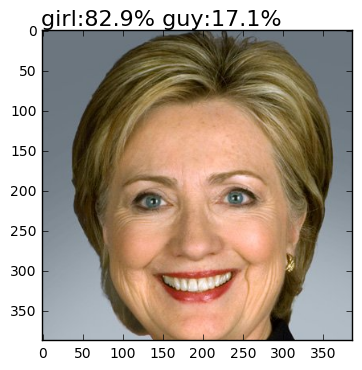

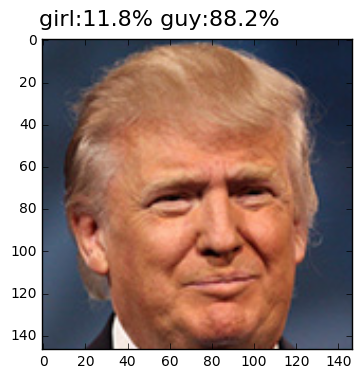

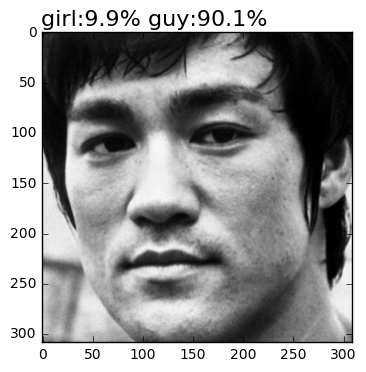

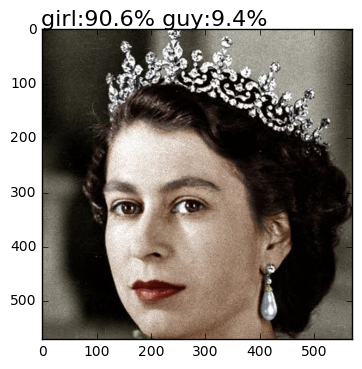

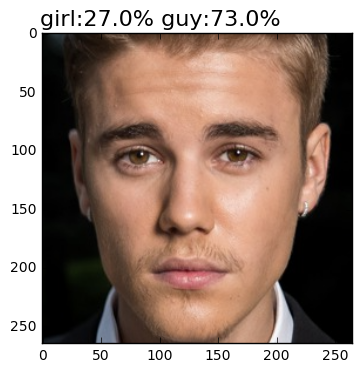

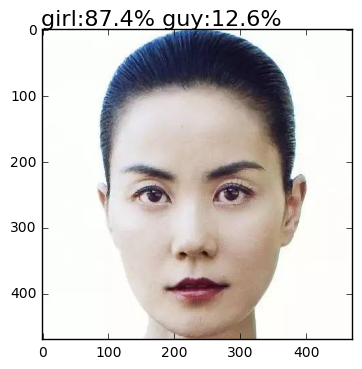

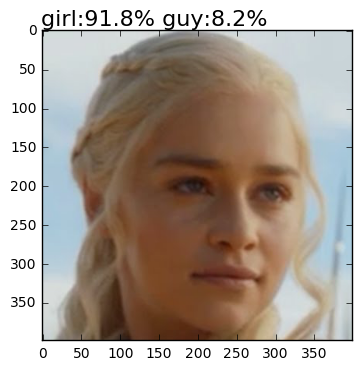

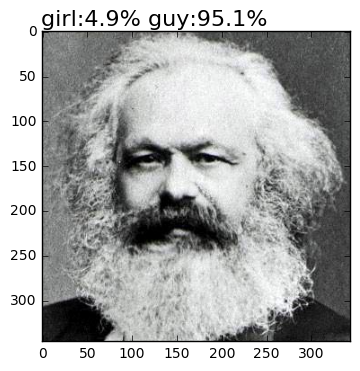

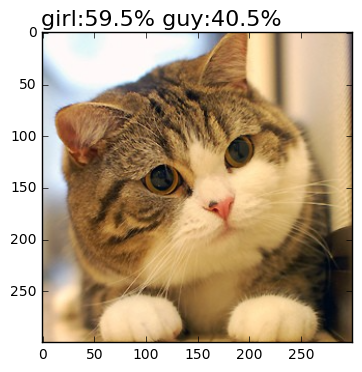

In [4]:
# Test data

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Image, Javascript
import PIL

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

%matplotlib inline

test_images = [ PIL.Image.open(f) for f in glob('data/test/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

for img in test_images:
    plt.figure()
    plt.imshow(img2array(img))
    img = img.resize((32, 32)).convert('L')
    image_data = np.asarray(img.getdata())

    girl_p, guy_p = model.predict(np.atleast_2d(image_data), verbose=0)[0]
    girl_p = round(girl_p * 100, 1)
    guy_p = round(guy_p * 100, 1)
    caption = 'girl:' + str(girl_p) + '% guy:' + str(guy_p) + '%'
    plt.text(-2, -7, caption, fontdict={'fontsize': 16})
    